In [38]:
import pandas as pd
print(pd.__version__)

import openpyxl
print(openpyxl.__version__)

import sys
print(sys.executable)

2.2.3
3.1.5
/home/newuser/Documents/.conda/bin/python


In [36]:
import pandas as pd
file_path = "/home/newuser/Documents/NDP/Battery/Battery_data/LISHEN/LISHEN_LFP_1.0C-2.0D_T25_1/LISHEN_LFP_1.0C-2.0D_T25_1.xlsx"
xls = pd.ExcelFile(file_path)
print("Sheet 名称如下：")
print(xls.sheet_names)

Sheet 名称如下：
['Cycle_66_4_8', 'Statis_66_4_8', 'Detail_66_4_8']


In [ ]:
# 2.load all data of the sheets
import pandas as pd
file_path = "/home/newuser/Documents/NDP/Battery/Battery_data/LISHEN/LISHEN_LFP_1.0C-2.0D_T25_1/LISHEN_LFP_1.0C-2.0D_T25_1.xlsx"
cycle = pd.read_excel(file_path, sheet_name='Cycle_66_4_8')
statis = pd.read_excel(file_path, sheet_name='Statis_66_4_8')
detail = pd.read_excel(file_path, sheet_name='Detail_66_4_8')
print(cycle.head())
print(statis.head())
print(detail.head())

   Channel  Cycle number  Chg. Cap.(mAh)  DChg. Cap.(mAh)
0        8             1     1531.165689       510.367511
1        8             2     1533.310044      1532.604800
2        8             3     1532.768889      1532.647289
3        8             4     1531.929956      1532.015111
4        8             5     1531.102578      1531.264356
   Channel  Cycle  Steps  Original step      State  Oneset Volt.(V)  \
0        8      1      1              1       Rest           3.2950   
1        8      1      2              2  CCCV DChg           3.1470   
2        8      1      3              3       Rest           2.0068   
3        8      1      4              4   CCCV Chg           2.4562   
4        8      2      5              1       Rest           3.9971   

   End Voltage(V)  Starting current(mA)  End Current(mA)  Capacity(mAh)  \
0          3.2952                  0.00             0.00       0.000000   
1          2.0001              -2997.20           -74.98     510.367511   


In [9]:
# Statistic the number of cycle
import pandas as pd
file_path = "/home/newuser/Documents/NDP/Battery/Battery_data/LISHEN/LISHEN_LFP_1.0C-2.0D_T25_1/LISHEN_LFP_1.0C-2.0D_T25_1.xlsx"
detail = pd.read_excel(file_path, sheet_name=2)
unique_cycles = detail['Cycle'].unique()
print(f"共发现 {len(unique_cycles)} 个循环(Cycle):")
print(unique_cycles)

共发现 187 个循环(Cycle):
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187]


In [29]:
# IC Curve from sheet3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "/home/newuser/Documents/NDP/Battery/Battery_data/LISHEN/LISHEN_LFP_1.0C-2.0D_T25_1/LISHEN_LFP_1.0C-2.0D_T25_1.xlsx"
detail = pd.read_excel(file_path, sheet_name='Detail_66_4_8') 
detail_1 = detail[(detail['Cycle'] == 1) & (detail['State'].str.contains('Charge', case=False))]
print(detail_1.head())
print(detail_1.columns)
print(detail_1.info())
print(detail_1.describe())
print(detail_1[['Voltage(V)', 'Capacity(mAh)']].head())

Empty DataFrame
Columns: [Record number, State, Jump, Cycle, Steps, Current(mA), Voltage(V), Capacity(mAh), Energy(Wh), Relative Time(h:min:s.ms), Date(h:min:s.ms)]
Index: []
Index(['Record number', 'State', 'Jump', 'Cycle', 'Steps', 'Current(mA)',
       'Voltage(V)', 'Capacity(mAh)', 'Energy(Wh)',
       'Relative Time(h:min:s.ms)', 'Date(h:min:s.ms)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record number              0 non-null      int64  
 1   State                      0 non-null      object 
 2   Jump                       0 non-null      int64  
 3   Cycle                      0 non-null      int64  
 4   Steps                      0 non-null      int64  
 5   Current(mA)                0 non-null      float64
 6   Voltage(V)                 0 non-null      float64
 7   Capacity(mAh)          

In [34]:
# 过滤掉异常的dV非零点
voltage = detail['Voltage(V)'].values
capacity = detail['Capacity(mAh)'].values
# 计算差分
dV = np.diff(voltage)
dQ = np.diff(capacity)

# 设置阈值，避免除以太小的数值
valid = np.abs(dV) > 1e-5
dQ_dV = dQ[valid] / dV[valid]
voltage_mid = (voltage[:-1] + voltage[1:]) / 2
voltage_mid = voltage_mid[valid]
print(detail_1[['Voltage(V)', 'Capacity(mAh)']].isnull().sum()) # 检查无空值


Voltage(V)       0
Capacity(mAh)    0
dtype: int64


Text(0.5, 1.0, 'Incremental Capacity Curve (Cycle 1 - Charge)')

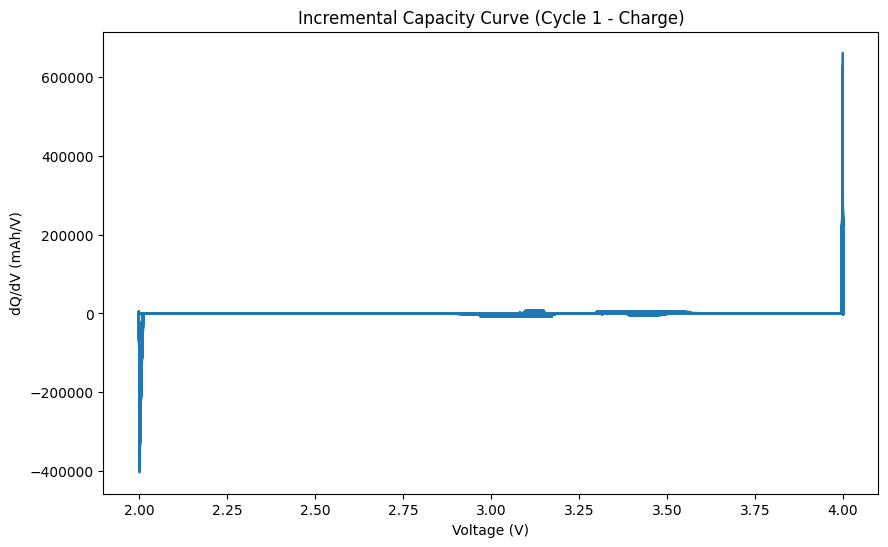

In [37]:
# voltage = detail['Voltage(V)'].values
# capacity = detail['Capacity(mAh)'].values
# dV = np.diff(voltage)
# dQ = np.diff(capacity)
# epsilon = 1e-8
# dQ_dV = dQ / (dV + epsilon)
# voltage_mid = (voltage[:-1] + voltage[1:]) / 2 
plt.figure(figsize=(10, 6))
plt.plot(voltage_mid, dQ_dV, label='Cycle 1 Charge')
plt.xlabel('Voltage (V)')
plt.ylabel('dQ/dV (mAh/V)')
plt.title('Incremental Capacity Curve (Cycle 1 - Charge)')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

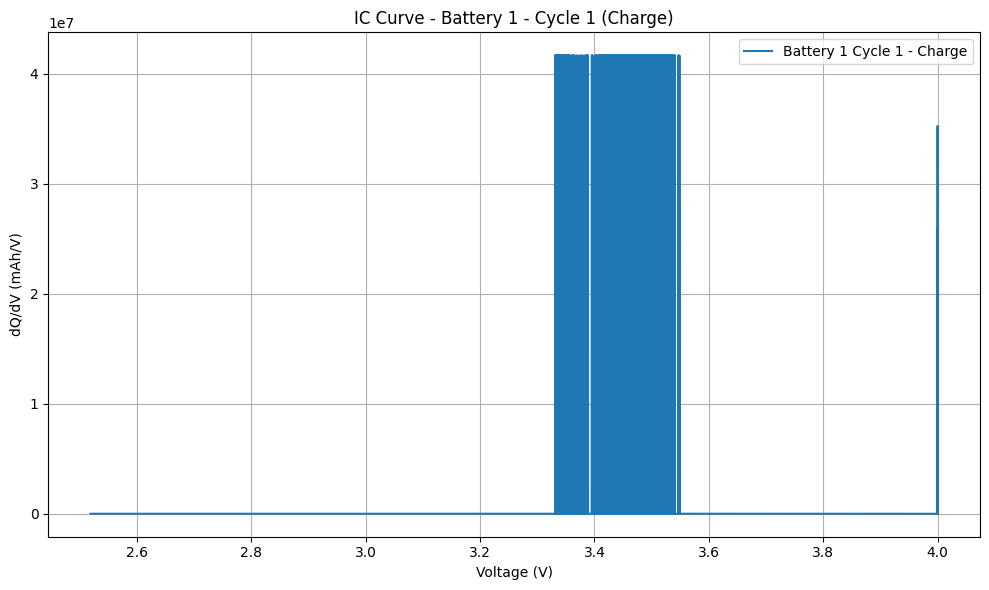

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 文件路径（只处理 Battery 1）
battery_name = "Battery 1"
file_path = "/home/newuser/Documents/NDP/Battery/Battery_data/LISHEN/LISHEN_LFP_1.0C-2.0D_T25_1/LISHEN_LFP_1.0C-2.0D_T25_1.xlsx"
sheet_name = "Detail_66_4_8"

# 读取数据
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 筛选 Cycle 1 且为充电阶段（State 包含 Chg 但不包含 DChg）
df_cycle1_charge = df[
    (df['Cycle'] == 1) &
    (df['State'].str.contains('Chg', case=False, na=False)) &
    (~df['State'].str.contains('DChg', case=False, na=False))
].copy()

# 提取 Voltage 和 Capacity
voltage = df_cycle1_charge['Voltage(V)'].values
capacity = df_cycle1_charge['Capacity(mAh)'].values

# 计算 dQ/dV
dV = voltage[1:] - voltage[:-1]
dQ = capacity[1:] - capacity[:-1]
epsilon = 1e-8  # 防止除以 0
dQ_dV = dQ / (dV + epsilon)
voltage_mid = (voltage[1:] + voltage[:-1]) / 2

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(voltage_mid, dQ_dV, label=f"{battery_name} Cycle 1 - Charge")
plt.xlabel("Voltage (V)")
plt.ylabel("dQ/dV (mAh/V)")
plt.title("IC Curve - Battery 1 - Cycle 1 (Charge)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()